In [382]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # Import the Logistic Regression class
from xgboost import XGBClassifier # Import the XGBClassifier class
# from lightgbm import LGBMClassifier # Import the LGBMClassifier class
from sklearn.svm import SVC #Import SVM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score,roc_curve, balanced_accuracy_score, recall_score
import pickle
sns.set()
print('Done importing the libraries.')

Done importing the libraries.


In [383]:
# Loading the dataset into variable 'data'
raw_data = pd.read_csv("diabetes-dataset.csv")
print('Dataset loaded successfully.')

Dataset loaded successfully.


In [384]:
# Display the first few rows to understand the structure of the dataset
raw_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [385]:
# Overview of data types and missing values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [386]:
raw_data.shape
raw_data_row = raw_data.shape[0]
raw_data_col = raw_data.shape[1]

print("The raw data has",raw_data_row,"rows and",raw_data_col,"columns.")

The raw data has 100000 rows and 9 columns.


In [387]:
#check unique values
unique_values = {}
for col in raw_data.columns:
    unique_values[col] = raw_data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
gender,3
age,102
hypertension,2
heart_disease,2
smoking_history,6
bmi,4247
HbA1c_level,18
blood_glucose_level,18
diabetes,2


In [388]:
#select variables that are medically likely to predict diabetes
data = raw_data[["gender","age","hypertension",	"smoking_history",	"bmi",	"HbA1c_level",	"blood_glucose_level",	"diabetes"]]

data

# # Check the unique values in the gender column
# unique_genders = data['gender'].unique()
# print(unique_genders)

# # Count occurrences of each gender
# gender_counts = data['gender'].value_counts()

# # Calculate percentages
# total_entries = len(data)
# percentage_male = (gender_counts.get('Male', 0) / total_entries) * 100
# percentage_female = (gender_counts.get('Female', 0) / total_entries) * 100

# print(f"Percentage of Male: {percentage_male:.2f}%")
# print(f"Percentage of Female: {percentage_female:.2f}%")

,gender,age,hypertension,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,never,25.19,6.6,140,0
1,Female,54.0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,never,27.32,5.7,158,0
3,Female,36.0,0,current,23.45,5.0,155,0
4,Male,76.0,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,never,35.42,4.0,100,0


In [389]:
# # Check if 'smoking_history' column exists in the dataset
# if 'smoking_history' in data.columns:
#     # Check unique values in the smoking_history column
#     unique_smoking_history = data['smoking_history'].unique()
#     print(unique_smoking_history)

#     # Count occurrences of each smoking history status
#     smoking_history_counts = data['smoking_history'].value_counts()

#     # Calculate percentages
#     total_entries = len(data)
#     smoking_history_percentages = (smoking_history_counts / total_entries) * 100

#     # Plot the bar chart
#     plt.figure(figsize=(8, 5))
#     smoking_history_percentages.plot(kind='bar', color='skyblue')

#     # Add title and labels
#     plt.title('Percentage of Smoking History in Dataset')
#     plt.xlabel('Smoking History')
#     plt.ylabel('Percentage (%)')

#     # Display the percentage values on the bars
#     for index, value in enumerate(smoking_history_percentages):
#         plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

#     # Show the plot
#     plt.xticks(rotation=0)
#     plt.tight_layout()
#     plt.show()

#     # Optionally, print the DataFrame to inspect if 'smoking_history' is still present
#     print(data.head())  # Or use .info(), .columns, etc.
# else:
#     print("Error: 'smoking_history' column not found in the dataset.")

In [390]:
data.head()

,gender,age,hypertension,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,never,25.19,6.6,140,0
1,Female,54.0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,never,27.32,5.7,158,0
3,Female,36.0,0,current,23.45,5.0,155,0
4,Male,76.0,1,current,20.14,4.8,155,0


In [391]:
# # Check the unique values in the gender column
# unique_genders = data['gender'].unique()
# print(unique_genders)

# # Count occurrences of each gender
# gender_counts = data['gender'].value_counts()

# # Calculate percentages
# total_entries = len(data)
# percentage_male = (gender_counts.get('Male', 0) / total_entries) * 100
# percentage_female = (gender_counts.get('Female', 0) / total_entries) * 100
# percentage_other = (gender_counts.get('Other', 0) / total_entries) * 100

# print(f"Percentage of Male: {percentage_male:.2f}%")
# print(f"Percentage of Female: {percentage_female:.2f}%")
# print(f"Percentage of Other: {percentage_other:.2f}%")

In [392]:
# # Check the unique values in the gender column
# unique_genders = data['gender'].unique()
# print("Unique values in gender column:", unique_genders)

# # Normalize the gender values to a consistent format (e.g., capitalize first letter, or strip leading/trailing spaces)
# data['gender'] = data['gender'].str.strip().str.capitalize()

# # Re-check the unique values after normalization
# unique_genders = data['gender'].unique()
# print("Normalized unique values in gender column:", unique_genders)

# # Count occurrences of each gender
# gender_counts = data['gender'].value_counts()

# # Calculate percentages
# total_entries = len(data)
# gender_percentages = (gender_counts / total_entries) * 100

# # Plot the bar chart
# plt.figure(figsize=(8, 5))
# gender_percentages.plot(kind='bar', color='lightcoral')

# # Add title and labels
# plt.title('Percentage of Genders in Dataset')
# plt.xlabel('Gender')
# plt.ylabel('Percentage (%)')

# # Display the percentage values on the bars
# for index, value in enumerate(gender_percentages):
#     plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# # Show the plot
# plt.xticks(rotation=0)
# plt.show()


In [393]:
# # Check the unique values in the hypertension column
# unique_hypertension = data['hypertension'].unique()
# print("Unique values in hypertension column:", unique_hypertension)

# # Count occurrences of each hypertension status
# hypertension_counts = data['hypertension'].value_counts()

# # Calculate percentages
# total_entries = len(data)
# hypertension_percentages = (hypertension_counts / total_entries) * 100

# # Plot the bar chart
# plt.figure(figsize=(8, 5))
# hypertension_percentages.plot(kind='bar', color='skyblue')

# # Add title and labels
# plt.title('Percentage of Hypertension Status in Dataset')
# plt.xlabel('Hypertension')
# plt.ylabel('Percentage (%)')
# plt.xticks([0, 1], ['No Hypertension', 'Hypertension'])

# # Display the percentage values on the bars
# for index, value in enumerate(hypertension_percentages):
#     plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# # Show the plot
# plt.xticks(rotation=0)
# plt.show()

In [394]:
# # Check the unique values in the hypertension column
# unique_diabetes = data['diabetes'].unique()
# print("Unique values in diabetes column:", unique_diabetes)

# # Count occurrences of each diabetes status
# diabetes_counts = data['diabetes'].value_counts()

# # Calculate percentages
# total_entries = len(data)
# diabetes_percentages = (diabetes_counts / total_entries) * 100

# # # Plot the bar chart
# # plt.figure(figsize=(8, 5))
# # diabetes_percentages.plot(kind='bar', color='skyblue')

# # # Add title and labels
# # plt.title('Percentage of Hypertension Status in Dataset')
# # plt.xlabel('Hypertension')
# # plt.ylabel('Percentage (%)')
# # plt.xticks([0, 1], ['No diabetes', 'diabetes'])

# # # Display the percentage values on the bars
# # for index, value in enumerate(diabetes_percentages):
# #     plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# # # Show the plot
# # plt.xticks(rotation=0)
# # plt.show()

In [395]:
# # Define age bins
# bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
# labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

# # Create age groups
# data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# # Count occurrences of each age group
# age_group_counts = data['age_group'].value_counts().sort_index()

# # Calculate percentages
# total_entries = len(data)
# age_group_percentages = (age_group_counts / total_entries) * 100

# print("\nAge group percentages:")
# for age_group, percentage in age_group_percentages.items():
#     print(f"{age_group}: {percentage:.2f}%")

In [396]:
# Plot the bar chart
# plt.figure(figsize=(10, 6))
# age_group_percentages.plot(kind='bar', color='skyblue')

# # Add title and labels
# plt.title('Percentage of Age Groups in Dataset')
# plt.xlabel('Age Group')
# plt.ylabel('Percentage (%)')

# # Display the percentage values on the bars
# for index, value in enumerate(age_group_percentages):
#     plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# # Show the plot
# plt.xticks(rotation=45)
# plt.show()

In [397]:
# # Check the unique values in the HBA1c_level column
# unique_HbA1c_level = data['HbA1c_level'].unique()
# print("Unique values in HbA1c_level column:", unique_HbA1c_level)

# # Define bins or categories for HbA1c levels
# bins = [0, 5.7, 6.5, 10]  # Example ranges based on medical classification

# # Group names for the bins
# group_names = ['Low', 'Normal', 'High']  # Medically relevant categories

# # Use pd.cut to categorize HbA1c levels into bins
# data['HbA1c_category'] = pd.cut(data['HbA1c_level'], bins=bins, labels=group_names)

# # Count occurrences of each category
# category_counts = data['HbA1c_category'].value_counts()

# # Calculate percentages
# total_entries = len(data)
# category_percentages = (category_counts / total_entries) * 100

# # Display results
# print("Percentage of each HbA1c category:")
# for category, percentage in category_percentages.items():
#     print(f"{category}: {percentage:.2f}%")

# data

In [398]:
# # Check the unique values in the Blood Glucose Level column
# unique_blood_glucose_level = data['blood_glucose_level'].unique()
# print("Unique values in Blood Glucose Level column:", unique_blood_glucose_level)

# # Define bins and labels for Blood Glucose Level groups
# bins = [0, 140, 200, 300]  # Example ranges for Blood Glucose Level groups
# labels = ['Low', 'Normal', 'High']  # Labels for Blood Glucose Level groups

# # Create Blood Glucose Level groups
# data['bg_level_group'] = pd.cut(data['blood_glucose_level'], bins=bins, labels=labels, right=False)

# # Count occurrences of each Blood Glucose Level group
# bg_level_group_counts = data['bg_level_group'].value_counts().sort_index()

# # Calculate percentages
# total_entries = len(data)
# bg_level_group_percentages = (bg_level_group_counts / total_entries) * 100

# # Print Blood Glucose Level group percentages with group prefix
# print("Blood Glucose Level group percentages:")

# for bg_group, percentage in bg_level_group_percentages.items():
#     print(f"{bg_group}: {percentage:.2f}%")

In [399]:

# # Define bins and labels for BMI groups
# bins = [0, 18.5, 24.9, 29.9, 100]  # Example ranges for BMI groups
# labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']  # Labels without group prefix

# # Create BMI groups
# data['bmi_group'] = pd.cut(data['bmi'], bins=bins, labels=labels, right=False)

# # Count occurrences of each BMI group
# bmi_group_counts = data['bmi_group'].value_counts().sort_index()

# # Calculate percentages
# total_entries = len(data)
# bmi_group_percentages = (bmi_group_counts / total_entries) * 100

# # Print BMI group percentages with group prefix
# print("BMI group percentages:")
# for bmi_group, percentage in bmi_group_percentages.items():
#     print(f"{bmi_group}: {percentage:.2f}%")

In [400]:
# data = pd.get_dummies(data, columns=['smoking_history'], prefix='smoking')
# # Check the dataset
# data

In [401]:
# Data cleaning
# Convert 'Female' to 0 and 'Male' to 1, and handle remaining NaN values
data['gender'] = data['gender'].fillna('Other').map({'Female': 0, 'Male': 1, 'Other': -1}).astype(int)

# Convert Age to Integer instead of Float
data['age'] = data['age'].astype(int)

# Convert Smoking History to integer, filling NaN values with 'No Info'
data['smoking_history'] = data['smoking_history'].fillna('No Info').map({'never': 0, 'current': 1,  'ever': 1, 'not current': 1, 'former': 1, 'No Info': -1})

# Check the dataset
data


/var/folders/jy/jtn3c__x48dc9xw74wlygz_00000gn/T/ipykernel_69032/1415181627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender'] = data['gender'].fillna('Other').map({'Female': 0, 'Male': 1, 'Other': -1}).astype(int)
/var/folders/jy/jtn3c__x48dc9xw74wlygz_00000gn/T/ipykernel_69032/1415181627.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['age'].astype(int)
/var/folders/jy/jtn3c__x48dc9xw74wlygz_00000gn/T/ipykernel_69032/1415181627.py:9: SettingWithCopyWarning: 
A value 

,gender,age,hypertension,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,0,25.19,6.6,140,0
1,0,54,0,-1,27.32,6.6,80,0
2,1,28,0,0,27.32,5.7,158,0
3,0,36,0,1,23.45,5.0,155,0
4,1,76,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,0,80,0,-1,27.32,6.2,90,0
99996,0,2,0,-1,17.37,6.5,100,0
99997,1,66,0,1,27.83,5.7,155,0
99998,0,24,0,0,35.42,4.0,100,0


In [402]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  int64  
 2   hypertension         100000 non-null  int64  
 3   smoking_history      100000 non-null  int64  
 4   bmi                  100000 non-null  float64
 5   HbA1c_level          100000 non-null  float64
 6   blood_glucose_level  100000 non-null  int64  
 7   diabetes             100000 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 6.1 MB


In [403]:
data

,gender,age,hypertension,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,0,25.19,6.6,140,0
1,0,54,0,-1,27.32,6.6,80,0
2,1,28,0,0,27.32,5.7,158,0
3,0,36,0,1,23.45,5.0,155,0
4,1,76,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,0,80,0,-1,27.32,6.2,90,0
99996,0,2,0,-1,17.37,6.5,100,0
99997,1,66,0,1,27.83,5.7,155,0
99998,0,24,0,0,35.42,4.0,100,0


In [404]:

# # Assuming raw_data is your original DataFrame
# data = data[["gender", "age","age_group", "hypertension", "smoking_history", "bmi", "HbA1c_level", "HbA1c_category", "blood_glucose_level",  "bg_level_group", "bmi_group", "diabetes"]]

# # Define a function to plot diabetes status across different categories
# def plot_diabetes_by_attribute(attribute):
#     # Count occurrences of diabetes status by attribute categories
#     diabetes_by_attribute = data.groupby(attribute)['diabetes'].mean() * 100

#     # Plot the bar chart
#     plt.figure(figsize=(8, 5))
#     diabetes_by_attribute.plot(kind='bar', color='Red')

#     # Add title and labels
#     plt.title(f'Percentage of Diabetes Status by {attribute}')
#     plt.xlabel(attribute)
#     plt.ylabel('Percentage with Diabetes (%)')

#     # Display the percentage values on the bars
#     for index, value in enumerate(diabetes_by_attribute):
#         plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

#     # Show the plot
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()


# # Example usage for each attribute
# plot_diabetes_by_attribute('gender')
# # plot_diabetes_by_attribute('age')
# plot_diabetes_by_attribute('age_group')
# plot_diabetes_by_attribute('hypertension')
# plot_diabetes_by_attribute('smoking_history')
# # plot_diabetes_by_attribute('bmi')
# plot_diabetes_by_attribute('bmi_group')
# # plot_diabetes_by_attribute('HbA1c_level')
# plot_diabetes_by_attribute('HbA1c_category')
# # plot_diabetes_by_attribute('blood_glucose_level')
# plot_diabetes_by_attribute('bg_level_group')


In [405]:
# # Assuming raw_data is your original DataFrame
# data = data[["gender", "age", "hypertension", "smoking_history", "bmi", "HbA1c_level", "HbA1c_category", "blood_glucose_level", "age_group", "bg_level_group", "bmi_group", "diabetes"]]

# # Define a function to plot diabetes status across different categories
# def plot_diabetes_by_attribute(attribute):
#     # Group by attribute and calculate percentage of diabetes and no diabetes
#     grouped_data = data.groupby(attribute)['diabetes'].value_counts(normalize=True).unstack() * 100
    
#     # Plot the grouped bar chart
#     plt.figure(figsize=(10, 6))
#     grouped_data.plot(kind='bar', stacked=False, color=['Green', 'Red'])

#     # Add title and labels
#     plt.title(f'Percentage of Diabetes Status by {attribute}')
#     plt.xlabel(attribute)
#     plt.ylabel('Percentage (%)')

#     # Add legend
#     plt.legend(['No Diabetes', 'Diabetes'], loc='upper right')

#     # Display the plot
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

# # Example usage for each attribute
# plot_diabetes_by_attribute('gender')
# plot_diabetes_by_attribute('age')
# plot_diabetes_by_attribute('age_group')
# plot_diabetes_by_attribute('hypertension')
# plot_diabetes_by_attribute('smoking_history')
# plot_diabetes_by_attribute('bmi')
# plot_diabetes_by_attribute('bmi_group')
# plot_diabetes_by_attribute('HbA1c_level')
# plot_diabetes_by_attribute('HbA1c_category')
# plot_diabetes_by_attribute('blood_glucose_level')
# plot_diabetes_by_attribute('bg_level_group')


In [406]:
# data = data.drop(columns=['age_group'])
# data = data.drop(columns=['bg_level_group'])
# data = data.drop(columns=['bmi_group'])
# data = data.drop(columns=['HbA1c_category'])

column_names = data.columns

print(column_names)
data

Index(['gender', 'age', 'hypertension', 'smoking_history', 'bmi',
       'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


,gender,age,hypertension,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,0,25.19,6.6,140,0
1,0,54,0,-1,27.32,6.6,80,0
2,1,28,0,0,27.32,5.7,158,0
3,0,36,0,1,23.45,5.0,155,0
4,1,76,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,0,80,0,-1,27.32,6.2,90,0
99996,0,2,0,-1,17.37,6.5,100,0
99997,1,66,0,1,27.83,5.7,155,0
99998,0,24,0,0,35.42,4.0,100,0


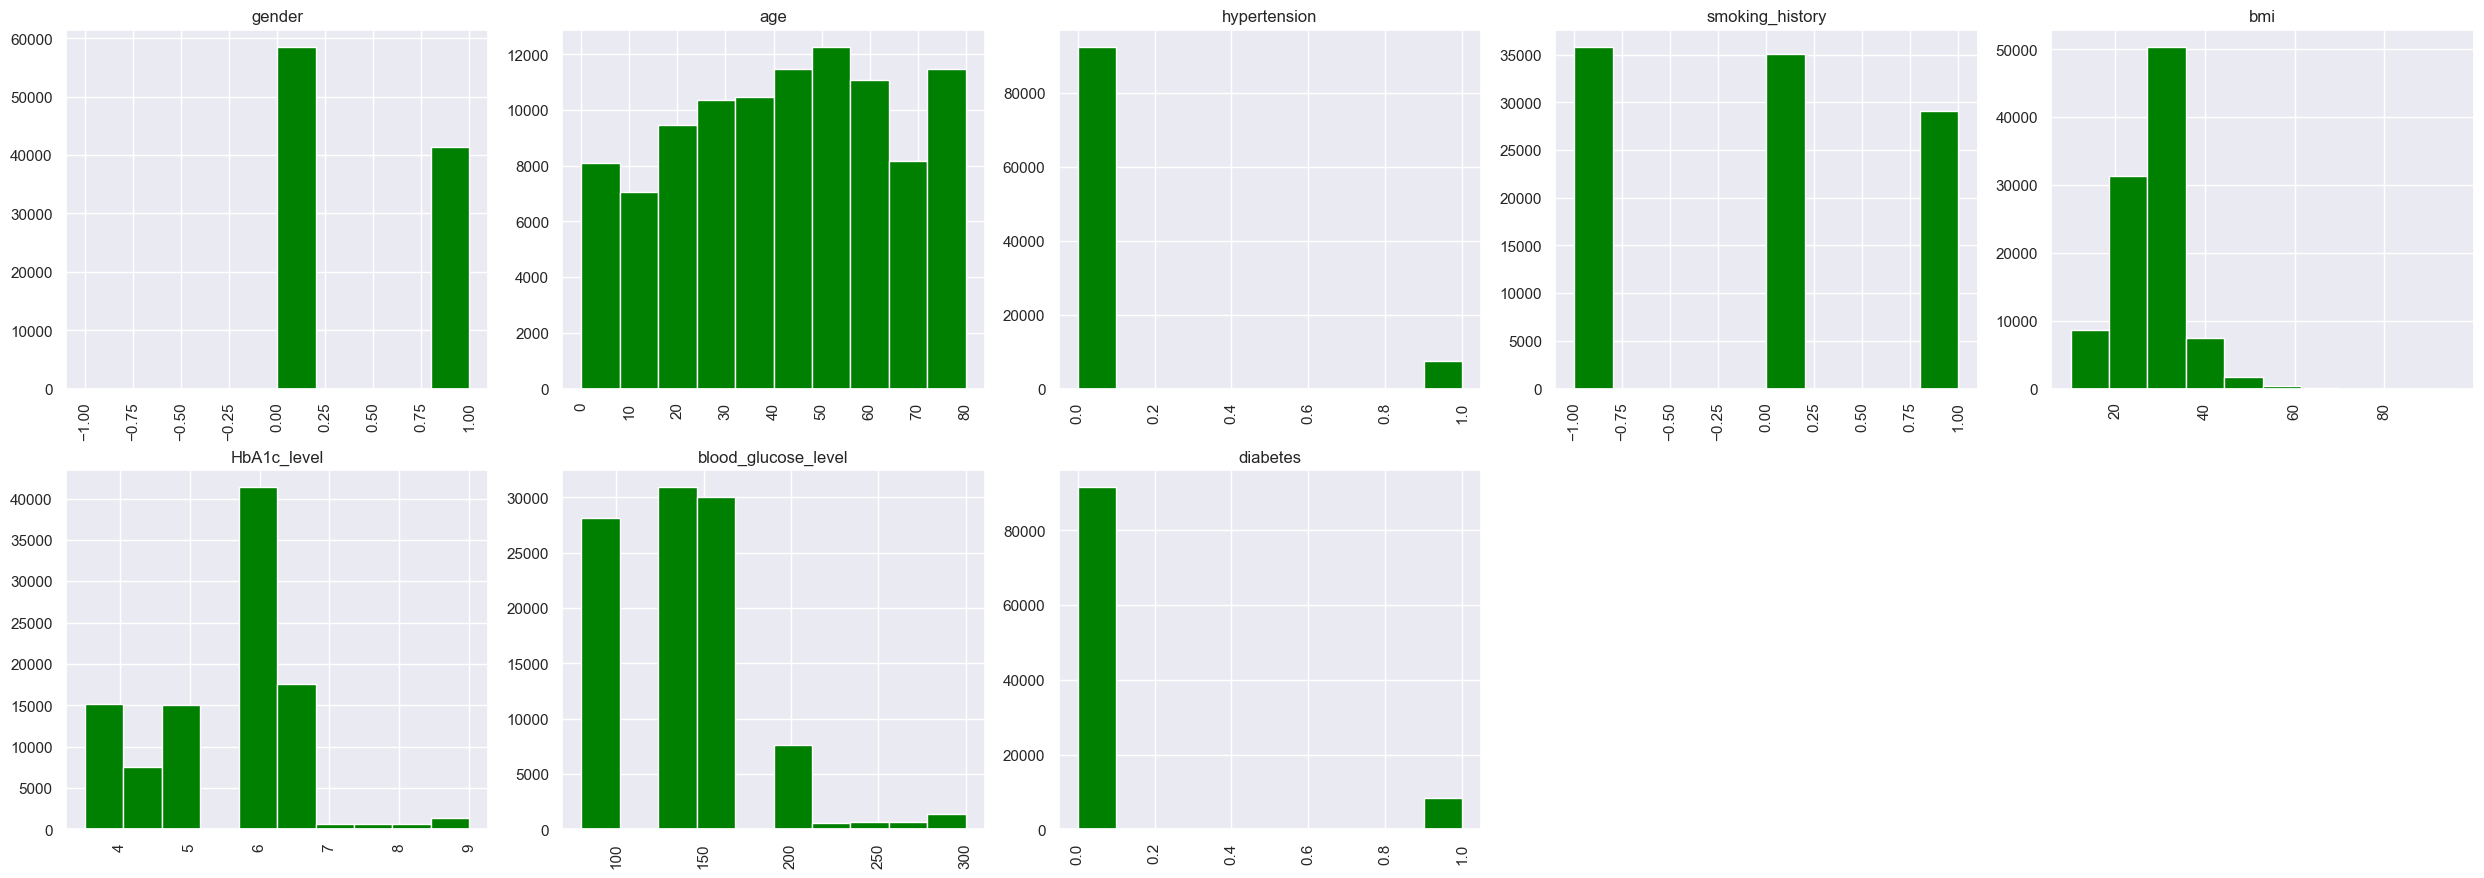

In [407]:
#check frequency of all values in the column

# Assuming 'data' is your DataFrame containing the dataset
# Filter out non-boolean columns (assuming 'color' is non-numeric)
feature_cols = [col for col in data.columns if col != 'color']

plt.figure(figsize=(25, 35))

# Loop through each feature column for subplots
for i, col in enumerate(feature_cols):
    plt.subplot(8, 5, i + 1)
    plt.title(col)
    plt.xticks(rotation=90)
    
    # Convert boolean data to integers (0 or 1) for histogram
    if data[col].dtype == bool:
        plt.hist(data[col].astype(int), color='green')
    else:
        plt.hist(data[col], color='green')

plt.tight_layout()
plt.show()

In [408]:
#check correlation of other columns with diabetes column


# data.drop('diabetes', axis=1).corrwith(data.diabetes).plot(kind='bar', grid=True, figsize=(10, 3), title="Correlation with Diabetes",color="green")

data.head()


,gender,age,hypertension,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,0,25.19,6.6,140,0
1,0,54,0,-1,27.32,6.6,80,0
2,1,28,0,0,27.32,5.7,158,0
3,0,36,0,1,23.45,5.0,155,0
4,1,76,1,1,20.14,4.8,155,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  int64  
 2   hypertension         100000 non-null  int64  
 3   smoking_history      100000 non-null  int64  
 4   bmi                  100000 non-null  float64
 5   HbA1c_level          100000 non-null  float64
 6   blood_glucose_level  100000 non-null  int64  
 7   diabetes             100000 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 6.1 MB
None
gender                 0
age                    0
hypertension           0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


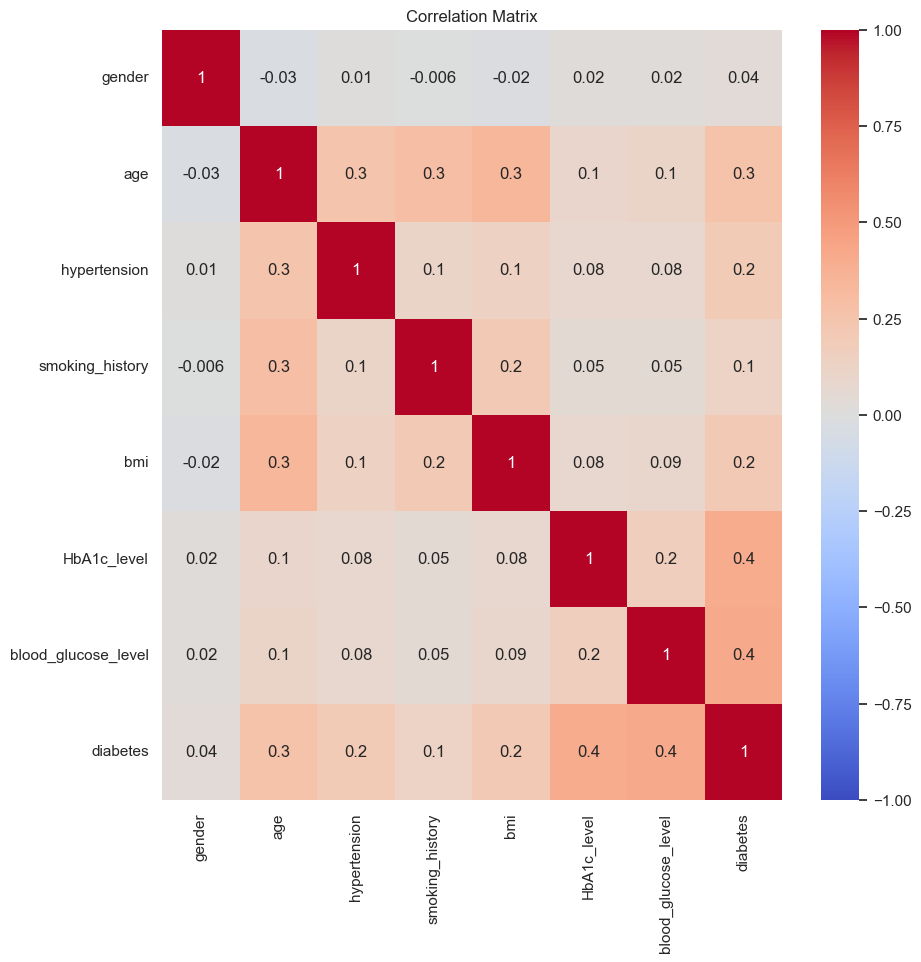

In [409]:
# Correlation between any two features
# check for possible co-variates

# sns.set(rc = {'figure.figsize':(10,10)})
# sns.heatmap(data.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')


# Check data types and missing values
print(data.info())
print(data.isnull().sum())

# Ensure only numeric columns are used for correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Create heatmap of correlations
sns.set(rc={'figure.figsize': (10, 10)})
sns.heatmap(numeric_data.corr(), vmin=-1, vmax=1, annot=True, fmt='.1g', cmap='coolwarm')

# Add title
plt.title('Correlation Matrix')

# Show plot
plt.show()

<Figure size 1200x500 with 0 Axes>

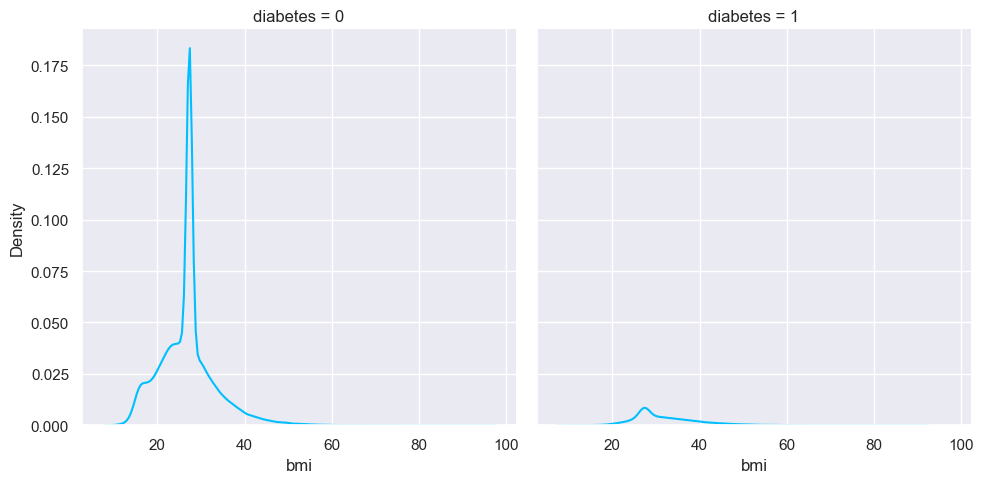

In [410]:
#for numeric variables
plt.figure(figsize=(12,5))
sns.displot(x='bmi', col='diabetes' , data = data, kind="kde" ,color = 'deepskyblue')

<Figure size 1200x2000 with 0 Axes>

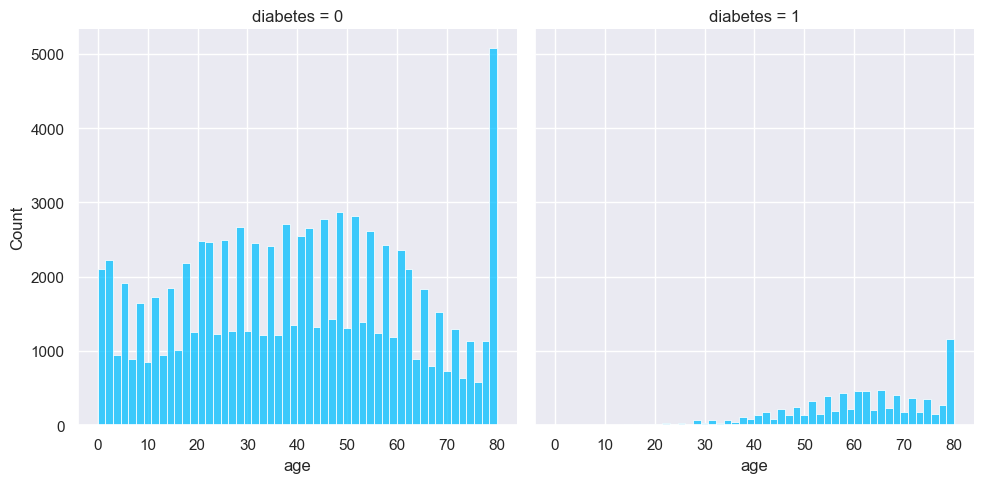

In [411]:
plt.figure(figsize=(12,20))
sns.displot(data=data,col='diabetes',x='age',color='deepskyblue')

In [412]:
# # Pairplot figure to show correlation betweean features
# sns.set(style='ticks', color_codes=True)
# figs = sns.pairplot(data, palette = ('g', 'r'), hue='diabetes', height=1.5)
# plt.show()

In [413]:
#  Histogram
# Separate the data into two groups: diabetes and no diabetes
# diabetes_data = data[data['diabetes'] == 1]['diabetes']
# no_diabetes_data = data[data['diabetes'] == 0]['diabetes']

# # Plot two histograms with different colors
# plt.hist(no_diabetes_data, bins=10, color='skyblue', label='No Diabetes')
# plt.hist(diabetes_data, bins=10, color='lightcoral', label='Diabetes', alpha=0.7)  # Use alpha to control transparency
# plt.xlabel('X Label')
# plt.ylabel('Y Label')
# plt.title('Histogram of Diabetes')
# plt.legend()  # Show legend for clarity
# plt.show()


In [414]:
diabetes_count = len(data[data['diabetes'] == 1])
print("Number of people with diabetes:", diabetes_count)

Number of people with diabetes: 8500


In [415]:
# Count the number of people with and without diabetes
# diabetes_count = len(data[data['diabetes'] == 1])
# no_diabetes_count = len(data[data['diabetes'] == 0])

# # Create labels and sizes for the pie chart
# labels = ['Diabetes', 'No Diabetes']
# sizes = [diabetes_count, no_diabetes_count]
# colors = ['crimson', 'lightskyblue']
# explode = (0.1, 0)  # explode the first slice (Diabetes)

# # Plot the pie chart
# plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
# plt.title('Distribution of Diabetes')
# plt.show()

In [416]:
# Define custom summary statistics function
def custom_summary_statistics(data):
    # Check if 'data' is a DataFrame or Series
    if isinstance(data, pd.DataFrame):
        # Compute summary statistics for each column
        summary_stats = data.describe()
        return summary_stats
    elif isinstance(data, pd.Series):
        # Compute specific summary statistics for a Series
        mean = data.mean()
        median = data.median()
        std = data.std()
        # Add more summary statistics as needed
        return mean, median, std
    else:
        raise TypeError("Unsupported data type. Expected pandas DataFrame or Series.")

# Assuming 'data' is your DataFrame or Series
try:
    # Example usage with DataFrame
    summary_stats_df = custom_summary_statistics(data)
    print("Summary Statistics for DataFrame:")
    print(summary_stats_df)
    
    # Example usage with Series (replace 'data['column']' with your actual Series)
    summary_stats_series = custom_summary_statistics(data['column'])
    print("\nSummary Statistics for Series:")
    print("Mean:", summary_stats_series[0])
    print("Median:", summary_stats_series[1])
    print("Standard Deviation:", summary_stats_series[2])

except TypeError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

Summary Statistics for DataFrame:
              gender            age  hypertension  smoking_history  \
count  100000.000000  100000.000000  100000.00000    100000.000000   
mean        0.414120      41.875660       0.07485        -0.067270   
std         0.492937      22.535417       0.26315         0.802827   
min        -1.000000       0.000000       0.00000        -1.000000   
25%         0.000000      24.000000       0.00000        -1.000000   
50%         0.000000      43.000000       0.00000         0.000000   
75%         1.000000      60.000000       0.00000         1.000000   
max         1.000000      80.000000       1.00000         1.000000   

                 bmi    HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000  100000.000000        100000.000000  100000.000000  
mean       27.320767       5.527507           138.058060       0.085000  
std         6.636783       1.070672            40.708136       0.278883  
min        10.010000       3.500000    

In [417]:

# Define features (X) and target variable (y)
# X = data[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level',
#         'gender_Female', 'gender_Male', 'smoking_history_No Info', 'smoking_history_current', 'smoking_history_never']]

X = data.drop('diabetes', axis=1)
y = data['diabetes']

data.head()

,gender,age,hypertension,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,0,25.19,6.6,140,0
1,0,54,0,-1,27.32,6.6,80,0
2,1,28,0,0,27.32,5.7,158,0
3,0,36,0,1,23.45,5.0,155,0
4,1,76,1,1,20.14,4.8,155,0


In [418]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

training_set_row = X_train.shape[0]
test_set_row = X_test.shape[0]
training_set_col = X_train.shape[1]
test_set_col = X_train.shape[1]

training_set = (training_set_row/raw_data_row)
test_set = (test_set_row/raw_data_row)

print("The training data has",training_set_row,"rows and",training_set_col,"columns.")
print("The testing data has",test_set_row,"rows and",test_set_col,"columns.")
print()
print("The model is being trained using " , training_set *100,"%"," of the dataset.")
print("The model is being tested using " , test_set *100,"%"," of the dataset.")

The training data has 80000 rows and 7 columns.
The testing data has 20000 rows and 7 columns.

The model is being trained using  80.0 %  of the dataset.
The model is being tested using  20.0 %  of the dataset.


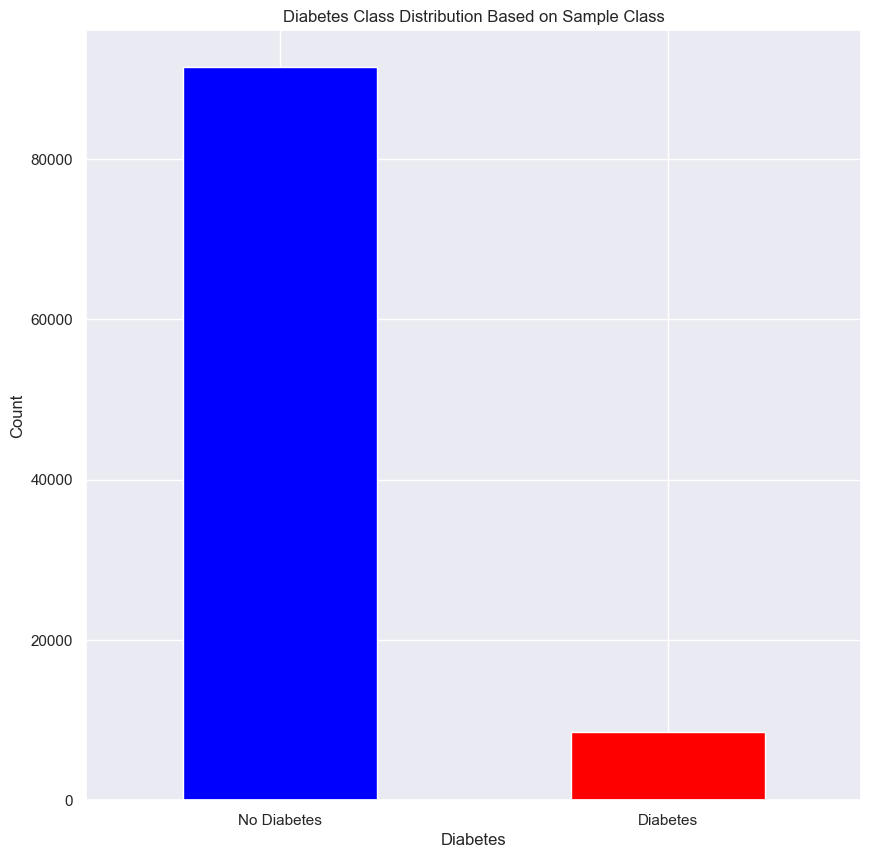

In [419]:
data['diabetes'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Diabetes Class Distribution Based on Sample Class')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], rotation=0)
plt.show()

In [420]:
data.head()

,gender,age,hypertension,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,0,25.19,6.6,140,0
1,0,54,0,-1,27.32,6.6,80,0
2,1,28,0,0,27.32,5.7,158,0
3,0,36,0,1,23.45,5.0,155,0
4,1,76,1,1,20.14,4.8,155,0


In [421]:
try:
    # Drop the 'age_group' column
    # X_train = X_train.drop(columns=['age_group'])
    # X_test = X_test.drop(columns=['age_group'])
    
    
    # Initialize StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train) # Fit and transform on training data
    X_test_scaled = scaler.transform(X_test) # Transform test data using the fitted scaler

    # Optionally, you can convert back to DataFrame if needed
    # X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    # X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    # Print or inspect scaled data
    # print("Scaled X_train:")
    # print(X_train_scaled)
    # print("\nScaled X_test:")
    # print(X_test_scaled)

except ValueError as e:
    print(f"ValueError: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

In [422]:
# sns.scatterplot(x=data['blood_glucose_level'],y=data['hypertension'], hue=data['diabetes'])

In [423]:
# Drop the 'age_group' column
# data = data.drop(columns=['age_group'])

# Prepare data for statsmodels
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Add a constant to the independent variables matrix (intercept term)
X = sm.add_constant(X)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the statsmodels logistic regression model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.114095
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99992
Method:                           MLE   Df Model:                            7
Date:                Mon, 15 Jul 2024   Pseudo R-squ.:                  0.6077
Time:                        11:53:00   Log-Likelihood:                -11409.
converged:                       True   LL-Null:                       -29081.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -27.4756      0.289    -94.922      0.000     -28.043     -26.908
g

In [424]:
############## Logistic Regression ##############

# Create and train the logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_lr = log_model.predict(X_test_scaled) # Make predictions

print("Logistic Regression Performance Metrics \n")

log_accuracy = accuracy_score(y_test, y_pred_lr)
log_f1 = f1_score(y_test, y_pred_lr)
log_precision = precision_score(y_test, y_pred_lr)
log_recall = recall_score(y_test, y_pred_lr)
log_balanced_accuracy = balanced_accuracy_score(y_test, y_pred_lr)
log_auc = roc_auc_score(y_test, y_pred_lr)
    
# print("Accuracy:", log_accuracy:.2f%)
print(f"{"Accuracy"}: {log_accuracy*100:.2f}%")
print(f"{"F1 Score"}: {log_f1*100:.2f}%")
print(f"{"Recall"}: {log_recall*100:.2f}%")
print(f"{"Precision"}: {log_precision*100:.2f}%")
print(f"{"Balanced Accuracy"}: {log_balanced_accuracy*100:.2f}%")
print(f"{"ROC AUC Score:"}: {log_auc*100:.2f}%")

Logistic Regression Performance Metrics 

Accuracy: 95.91%
F1 Score: 71.87%
Recall: 61.18%
Precision: 87.08%
Balanced Accuracy: 80.17%
ROC AUC Score:: 80.17%


In [425]:
############## XGBClassifier ##############
xgm_model= XGBClassifier()
xgm_model.fit(X_train_scaled, y_train)
y_pred_xgb =xgm_model.predict(X_test_scaled) # Make predictions
xgb = accuracy_score(y_pred_xgb, y_test)

#### Performance Metrics ####
xgm_accuracy = accuracy_score(y_test, y_pred_xgb)
xgm_f1 = f1_score(y_test, y_pred_xgb)
xgm_precision = precision_score(y_test, y_pred_xgb)
xgm_recall = recall_score(y_test, y_pred_xgb)
xgm_balanced_accuracy = balanced_accuracy_score(y_test, y_pred_xgb)
xgm_auc = roc_auc_score(y_test, y_pred_xgb)
    
print("XGBoost Performance Metrics\n")
print(f"{"Accuracy"}: {xgm_accuracy*100:.2f}%")
print(f"{"F1 Score"}: {xgm_f1*100:.2f}%")
print(f"{"Recall"}: {xgm_recall*100:.2f}%")
print(f"{"Precision"}: {xgm_precision*100:.2f}%")
print(f"{"Balanced Accuracy"}: {xgm_balanced_accuracy*100:.2f}%")
print(f"{"ROC AUC Score"}: {xgm_auc*100:.2f}%")

XGBoost Performance Metrics

Accuracy: 97.16%
F1 Score: 80.63%
Recall: 69.32%
Precision: 96.34%
Balanced Accuracy: 84.54%
ROC AUC Score: 84.54%


In [426]:
############## KNN ##############
# Train and evaluate kNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

print("K-Nearest Neighbour Performance Metrics\n")

knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_balanced_accuracy = balanced_accuracy_score(y_test, y_pred_knn)
knn_auc = roc_auc_score(y_test, y_pred_knn)
    

print(f"{"Accuracy"}: {knn_accuracy*100:.2f}%")
print(f"{"F1 Score"}: {knn_f1*100:.2f}%")
print(f"{"Recall"}: {knn_recall*100:.2f}%")
print(f"{"Precision"}: {knn_precision*100:.2f}%")
print(f"{"Balanced Accuracy"}: {knn_balanced_accuracy*100:.2f}%")
print(f"{"ROC AUC Score:"}: {knn_auc*100:.2f}%")


K-Nearest Neighbour Performance Metrics

Accuracy: 96.30%
F1 Score: 74.51%
Recall: 63.23%
Precision: 90.68%
Balanced Accuracy: 81.31%
ROC AUC Score:: 81.31%


In [427]:
############## SVM ##############


svm_clf = SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)

# print(classification_report(y_test, y_pred))

print("Support Vector Machine Performance Metrics\n")

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_balanced_accuracy = balanced_accuracy_score(y_test, y_pred_svm)
svm_auc = roc_auc_score(y_test, y_pred_svm)
    

print(f"{"Accuracy"}: {svm_accuracy*100:.2f}%")
print(f"{"F1 Score"}: {svm_f1*100:.2f}%")
print(f"{"Recall"}: {svm_recall*100:.2f}%")
print(f"{"Precision"}: {svm_precision*100:.2f}%")
print(f"{"Balanced Accuracy"}: {svm_balanced_accuracy*100:.2f}%")
print(f"{"ROC AUC Score:"}: {svm_auc*100:.2f}%")


Support Vector Machine Performance Metrics

Accuracy: 95.88%
F1 Score: 70.18%
Recall: 56.85%
Precision: 91.69%
Balanced Accuracy: 78.18%
ROC AUC Score:: 78.18%


In [428]:
######################## Light Gradient Boosting Machine Classifier ################################

# lgbm_model= LGBMClassifier(verbosity=-1)
# lgbm_model.fit(X_train_scaled, y_train)
# y_pred_lgbm =lgbm_model.predict(X_test_scaled)
# lgbm_accuracy= accuracy_score(y_pred_lgbm, y_test)
# lgbm_accuracy


In [429]:
#function that get y_test and calculate into df all the relevant metric
def train_evaluate_model(y_test, y_pred):
    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    # print("Accuracy:", accuracy)
    # print("Precision:", precision)
    # print("Recall:", recall)
    # print("F1 Score:", f1)
    # print("ROC AUC Score:", auc)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy, auc]], columns=['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Balanced Accuracy', 'ROC-AUC'])
    return eval_df

#model metrics
log_results = train_evaluate_model(y_test, y_pred_lr)
xgb_results = train_evaluate_model(y_test, y_pred_xgb)
knn_results = train_evaluate_model(y_test, y_pred_knn)
svm_results = train_evaluate_model(y_test, y_pred_svm)

# Combine results into a single DataFrame
combined_results = pd.concat([log_results, xgb_results, knn_results, svm_results], keys=['Logistic Regression', 'XGBoost', 'KNN', 'SVM'])
combined_results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))



,,Accuracy,F1 Score,Precision,Recall,Balanced Accuracy,ROC-AUC
Logistic Regression,0,0.959100,0.718707,0.870833,0.611827,0.801677,0.801677
XGBoost,0,0.971550,0.806265,0.963385,0.693208,0.845374,0.845374
KNN,0,0.963050,0.745085,0.906801,0.632319,0.813125,0.813125
SVM,0,0.958750,0.701843,0.916903,0.568501,0.781845,0.781845


In [430]:
# Store their evaluation results in a dictionary
model_results = {
    'Logistic Regression': log_results,
    'XGBoost': xgb_results,
    'k-Nearest Neighbors': knn_results,
    'SVM': svm_results
}

In [431]:
# Find the model with the highest accuracy
best_model_name = max(model_results, key=lambda k: model_results[k]['Accuracy'].iloc[0])
best_model = None

# Retrieve the best model
if best_model_name == 'Logistic Regression':
    best_model = log_model
elif best_model_name == 'XGBoost':
    best_model = xgm_model
elif best_model_name == 'k-Nearest Neighbors':
    best_model = knn_model
    
# print(best_model_name)
# print(best_model)



In [432]:
# Save the best model and scaler to files
if best_model:
    with open('best_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)
    print(f"The best model ({best_model_name}) has been saved to 'best_model.pkl'.")

    with open('scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    print("The scaler has been saved to 'scaler.pkl'.")
else:
    print("Error: No best model found.")

The best model (XGBoost) has been saved to 'best_model.pkl'.
The scaler has been saved to 'scaler.pkl'.


In [433]:
# # Make predictions on the test set
# # y_pred = model.predict(X_test)

# # Create confusion matrix
# cm = confusion_matrix(y_test, log_model_y_pred)

# # Plot confusion matrix as heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix')
# plt.show()

In [434]:
# # assigning values to True Positives, False Negative etc
# TP = cm[1, 1]
# TN = cm[0, 0]
# FP = cm[0, 1]
# FN = cm[1, 0]
# # sensitivity score = TP/ (TP+FN)
# sensitivity = TP/ (TP+FN)
# print(sensitivity)

In [435]:
# # Compute Precision-Recall curve
# precision, recall, _ = precision_recall_curve(y_test, y_pred)
# average_precision = average_precision_score(y_test, y_pred)

In [436]:
# # Plot Precision-Recall curve
# plt.figure()
# lw = 2
# plt.plot(recall, precision, color='blue', lw=lw, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend(loc="lower right")
# plt.show()

In [437]:
# # Compute ROC curve and ROC area for each class
# fpr, tpr, _ = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)

In [438]:
# # Plot ROC curve
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()